## Reading image data in Python: EDA (Exploratory Data Analysis)

We take as example one image: it is the **RGB** `.png` thumbnail of the first plot, 
as created by `drone2report` `ROIs` task.

We start by import libraries: we are using the `imageio` *Python* library for input/output of image data (tiff raster images in this illustration):

In [71]:
import numpy as np
import numpy.ma as ma
import imageio.v2 as imageio
import matplotlib.pyplot as plt

In [70]:
fname = '../../paper-drone2report/results/single_rgb_plot/ROI_id=2.png'
pic = imageio.imread(fname)

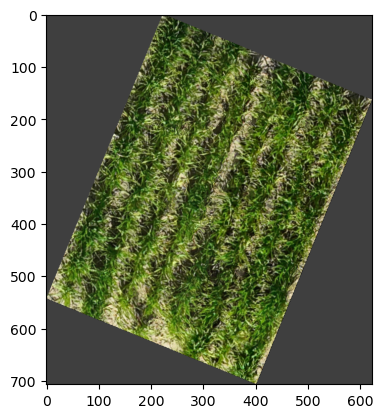

In [72]:
plt.figure()
plt.imshow(pic)

This is the image of a single plot from the orthomosaic: it's a thumbnail from `drone2report` `ROIs` task, and as such is more compressed and has gray pixels (`#636363`) in the empty corners (result of georeferencing and orientation of the image).

This image is 707 x 612 pixles, and has three channels (RGB):

In [ ]:
print('Type of the image : ' , type(pic))
print()
print('Shape of the image : {}'.format(pic.shape))
print('Image Hight {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

The **total number of input pixels is 432,684**.

Below we try to display the three channels separately: 

In [ ]:
plt.figure()
plt.title('R channel 0')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[:,:,0], cmap='Reds')

In [ ]:
plt.title('R channel 1')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 1], cmap='Greens')

In [ ]:
plt.title('R channel 2')
plt.ylabel('Height {}'.format(pic.shape[0]))
plt.xlabel('Width {}'.format(pic.shape[1]))

plt.imshow(pic[ : , : , 2], cmap='Blues')

We here check the gray corners of the image (absence of crop plot): 

In [ ]:
pic[ : , : , 2]

We can mess with the pixel intensity and change as we wish: e.g., below we boost the intensity of the red channel

In [ ]:
pic[0:720 , : , 0] = 255 # full intensity to those pixel's R channel
pic[:, 210:220, 0]

In [ ]:
plt.figure()
plt.imshow(pic[:,:,:])

If we exaggerate and boost the intensity of all channels, we get a white image (max intensity):

In [ ]:
pic[0:720 , : , 1] = 255 # full intensity to those pixel's R channel
pic[0:720 , : , 2] = 255

In [ ]:
plt.figure()
plt.imshow(pic[:,:,:])

A different way to split an RGB image in the three component channels:

In [ ]:
pic = imageio.imread(fname)

## return the overall figure and the specified subplots
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))

for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    # assing each channel 
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)

## Tiff image files

Instead of reading the `.png` thumbnail, we can read directly the `.tiff` image file of one single plot from the orthomosaic: 

In [73]:
fname = '../../paper-drone2report/data/single_rgb_plot/single_rgb_plot.tif'
pic = imageio.imread(fname)

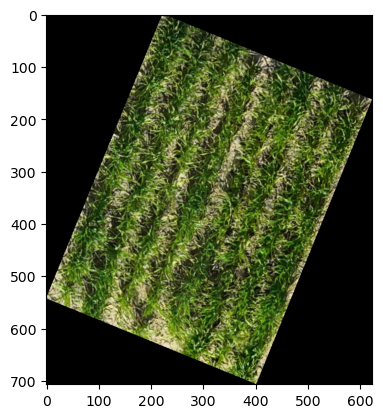

In [74]:
plt.figure()
plt.imshow(pic)

The `.tiff` image has black corners (not gray), but has basically the same dimension in terms of pixels (left aside the different compression).

In [ ]:
print('Type of the image : ' , type(pic))
print()
print('Shape of the image : {}'.format(pic.shape))
print('Image Hight {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

In [ ]:
## calculate the n. of pixels (one channel)
707*611

Now we see another way to read image data in **Python**: no longer the `imageio` library, but the `PIL` module from `Image`:

In [ ]:
from PIL import Image
im = Image.open(fname)
im.show()

In [ ]:
imarray = np.array(im)
imarray.shape